# Convolution

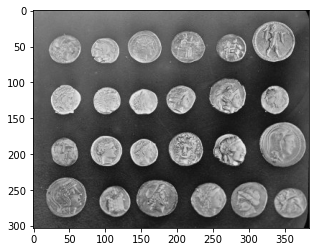

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

image = data.coins()
plt.imshow(image, cmap="gray")

In [25]:
image.shape

(303, 384)

In [2]:
k_edge = np.array((
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]),
    dtype='int')
k_gauss = np.array((
    [1, 4, 1],
    [4, 9, 4],
    [1, 4, 1]),
    dtype='int') / 29
k_sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]),
    dtype="int")
k_sobel_y = np.array((
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1]),
    dtype="int")

In [5]:
image

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

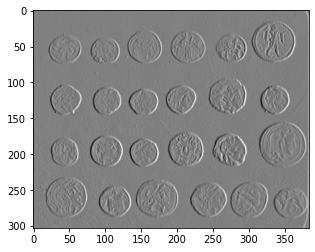

In [6]:
from scipy.signal import convolve2d
image_x = convolve2d(image, k_sobel_x, mode="same")
plt.imshow(image_x, cmap="gray")

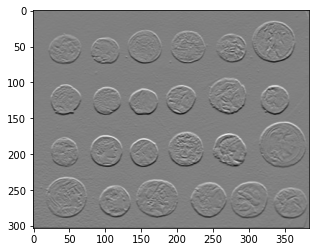

In [7]:
image_y = convolve2d(image, k_sobel_y, mode="same")
plt.imshow(image_y, cmap="gray")

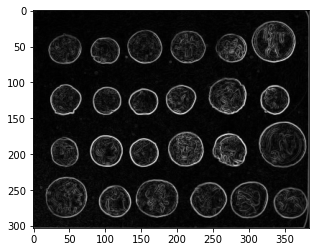

In [8]:
img_edge = (image_y ** 2 + image_x ** 2) ** .5
plt.imshow(img_edge, cmap="gray")

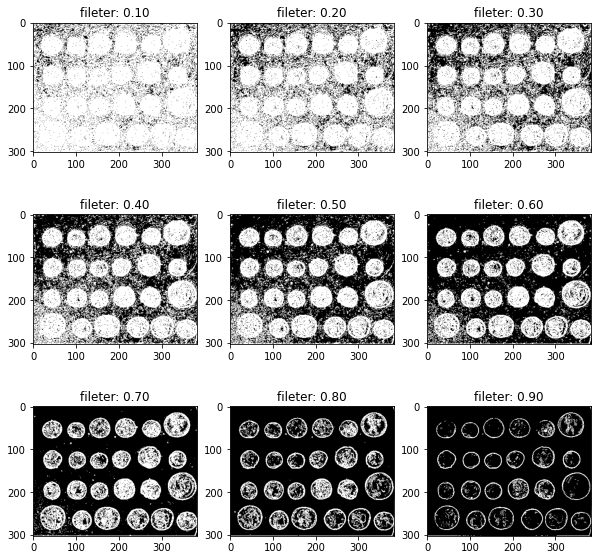

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
i = 0.1
for r in range(3):
    for c in range(3):
        axs[r, c].imshow(img_edge > np.quantile(img_edge, i), cmap="gray")
        axs[r, c].set_title("fileter: %.2f" % i)
        i += 0.1

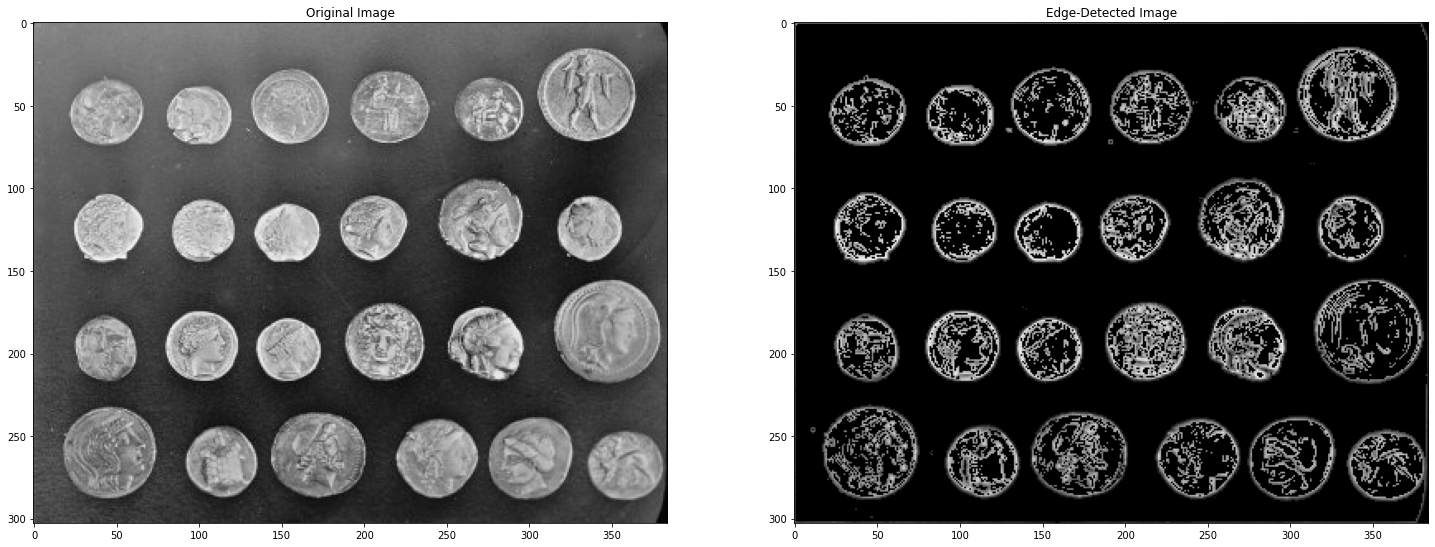

In [10]:
mask = img_edge > np.quantile(img_edge, 0.8)
new_image = np.zeros(image.shape)
new_image[mask] = image[mask]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 15))
axes[0].imshow(image, cmap="gray")
axes[0].title.set_text("Original Image")
axes[1].imshow(new_image, cmap="gray")
axes[1].title.set_text("Edge-Detected Image")

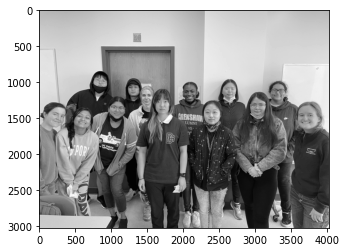

In [38]:
image = plt.imread('ANS198GroupPhoto1.jpg')
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
image = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(image, cmap='gray')
plt.show()


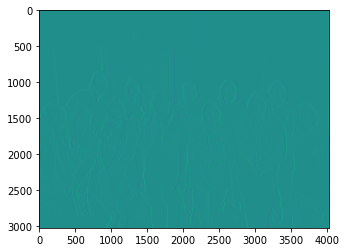

In [39]:
image_x = convolve2d(image, k_sobel_x, mode="same")
plt.imshow(image_x)

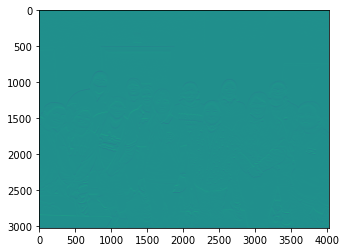

In [40]:
image_y = convolve2d(image, k_sobel_y, mode="same")
plt.imshow(image_y)

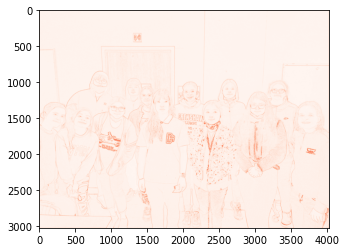

In [45]:
img_edge = (image_y ** 2 + image_x ** 2) ** .5
plt.imshow(img_edge,cmap="Reds")

In [42]:
image

array([[186.0693, 177.0702, 182.0697, ..., 178.9237, 179.9236, 179.9236],
       [182.0697, 188.0691, 183.0696, ..., 180.9235, 181.9234, 184.9231],
       [190.0689, 186.0693, 191.0688, ..., 181.9234, 179.9236, 181.9234],
       ...,
       [206.7225, 204.7227, 212.7219, ...,  65.0922,  73.3194,  86.03  ],
       [201.0112, 199.0114, 208.0105, ...,  71.0916,  83.3184,  75.3192],
       [201.0112, 200.0113, 207.0106, ...,  79.0908,  72.3195,  74.3193]])